In [37]:
import pandas as pd
from functions.cleaning import cleaningRetailOrderHistDF
from functions.parsing import parseRetailOrderHistDtypes

In [38]:
RetailOrderHistDF = pd.read_csv("D:\ML wing\Retail.OrderHistory.2.csv")
RetailOrderHistDF.shape

(30, 27)

In [39]:
RetailOrderHistDF['Shipping Charge']=RetailOrderHistDF['Shipping Charge'].astype(float)
RetailOrderHistDF = parseRetailOrderHistDtypes(cleaningRetailOrderHistDF(RetailOrderHistDF))

In [40]:
RetailOrderHistDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   Website                         30 non-null     object             
 1   Order ID                        30 non-null     object             
 2   Order Date                      30 non-null     datetime64[ns, UTC]
 3   Purchase Order Number           0 non-null      float64            
 4   Currency                        30 non-null     object             
 5   Unit Price                      30 non-null     float64            
 6   Unit Price Tax                  30 non-null     float64            
 7   Shipping Charge                 30 non-null     float64            
 8   Total Discounts                 30 non-null     float64            
 9   Total Owed                      30 non-null     float64            
 10  Shipment Item Su

In [41]:
import datetime as dt
import calendar as cl
def addMonth(df):
    months=df.iloc[:,2].dt.month_name(locale="English")
    df['month']=months

def addTime(df):
    time=df.iloc[:,2].dt.hour
    times= {(4,5,6,7,8,9,10,11,12): 1, (13,14,15,16): 2, (17,18,19,20): 3, (21,22,23,24,1,2,3): 4}
    time_name={
        1:"morning",
        2:"afternoon",
        3:"evening",
        4:"night"
    }
    def tm(ser):
        for k in times.keys():
            if ser in k:
                return time_name[times[k]]
    df['time']=time.apply(tm)

def addSeason(df):
    month_no=df.iloc[:,2].dt.month
    seasons = {(1, 12, 2): 1, (3, 4, 5): 2, (6, 7, 8): 3, (9, 10, 11): 4}
    season_name={
        1:"winter",
        2:"summer",
        3:"rainy",
        4:"autumn"
    }
    def season(ser):
        for k in seasons.keys():
            if ser in k:
                return season_name[seasons[k]]

    df['season'] = month_no.apply(season)


In [42]:
addMonth(RetailOrderHistDF)
RetailOrderHistDF['month']

0     September
1     September
2     September
3        August
4        August
5        August
6        August
7        August
8        August
9        August
10       August
11         July
12         July
13         July
14         July
15         July
16         June
17         June
18         June
19         June
20          May
21          May
22          May
23          May
24          May
25          May
26          May
27     February
28      October
29       August
Name: month, dtype: object

In [43]:
addTime(RetailOrderHistDF)
RetailOrderHistDF['time']

0       morning
1       morning
2       evening
3       morning
4       morning
5       morning
6     afternoon
7       morning
8       morning
9       morning
10      evening
11      morning
12      evening
13      morning
14      morning
15    afternoon
16    afternoon
17      morning
18      morning
19      morning
20      evening
21    afternoon
22      morning
23      morning
24      morning
25      morning
26      morning
27      evening
28      evening
29      morning
Name: time, dtype: object

In [44]:
addSeason(RetailOrderHistDF)
RetailOrderHistDF['season']

0     autumn
1     autumn
2     autumn
3      rainy
4      rainy
5      rainy
6      rainy
7      rainy
8      rainy
9      rainy
10     rainy
11     rainy
12     rainy
13     rainy
14     rainy
15     rainy
16     rainy
17     rainy
18     rainy
19     rainy
20    summer
21    summer
22    summer
23    summer
24    summer
25    summer
26    summer
27    winter
28    autumn
29     rainy
Name: season, dtype: object

In [45]:
# Extra feature
def addDeliverTime(df):
    df['delivery_time']=df['Ship Date']-df['Order Date']


In [46]:
addDeliverTime(RetailOrderHistDF)
RetailOrderHistDF['delivery_time']

0          2 days 00:39:07
1          0 days 04:38:03
2          0 days 01:16:29
3          0 days 05:44:39
4          0 days 08:40:48
5          0 days 06:40:48
6          0 days 06:12:59
7          0 days 23:10:48
8          0 days 02:07:35
9          1 days 07:01:50
10         0 days 00:00:57
11         0 days 05:10:23
12         0 days 10:09:50
13         0 days 03:18:56
14   -19190 days +17:02:24
15         1 days 01:38:58
16         0 days 17:17:29
17         0 days 13:50:30
18         0 days 02:01:57
19         0 days 12:28:31
20         0 days 13:38:40
21         0 days 14:33:31
22         1 days 03:09:20
23         1 days 07:48:16
24         1 days 07:48:16
25         0 days 04:06:31
26   -19125 days +13:36:17
27         0 days 03:32:10
28         0 days 00:14:06
29         0 days 00:01:13
Name: delivery_time, dtype: timedelta64[ns]

In [47]:
def timely_spend(df):
    timely_spending=df.groupby(df['time'])['Total Owed'].mean()
    return timely_spending

In [48]:
timely_spending=timely_spend(RetailOrderHistDF)
timely_spending

time
afternoon    323.250000
evening      501.666667
morning      348.830000
Name: Total Owed, dtype: float64

In [49]:
def seasonly_spend(df):
    seasonly_spending=df.groupby(df['season'])['Total Owed'].mean()
    return seasonly_spending

In [50]:
seasonly_spendings=seasonly_spend(RetailOrderHistDF)
seasonly_spendings

season
autumn    285.250000
rainy     484.200000
summer    150.571429
winter    369.000000
Name: Total Owed, dtype: float64

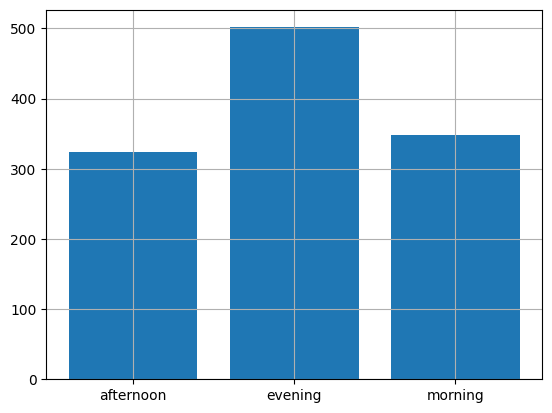

In [51]:
from matplotlib import pyplot as plt
plt.bar(x=timely_spending.index,height=timely_spending)
plt.grid()

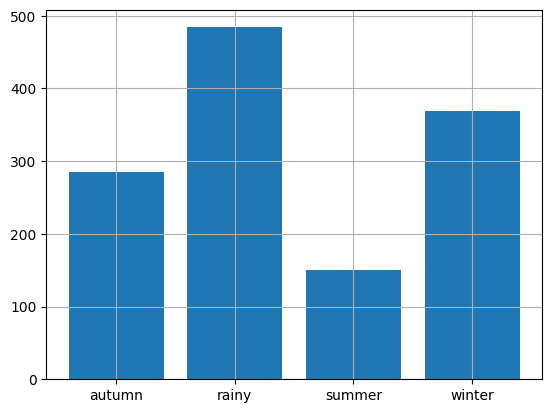

In [52]:
plt.bar(x=seasonly_spendings.index,height=seasonly_spendings)
plt.grid()